# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [1]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [2]:
#I will start by removing names and ids.
# cdf is a CleansedDataFrame
cdf = df.drop(columns=['WaterworksName', 'SumOfld_layer'])
cdf 

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,Footprint,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,NaN,...,143.341204,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,15.217089,...,16.714412,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,28.970630,...,44.693822,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,NaN,...,194.588021,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,NaN,...,412.300024,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,60.686602,...,24.106636,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,19.339643,...,22.050800,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,25.079249,...,209.076387,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,NaN,...,152.513970,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


# Time to investigate the missing values.

<Axes: >

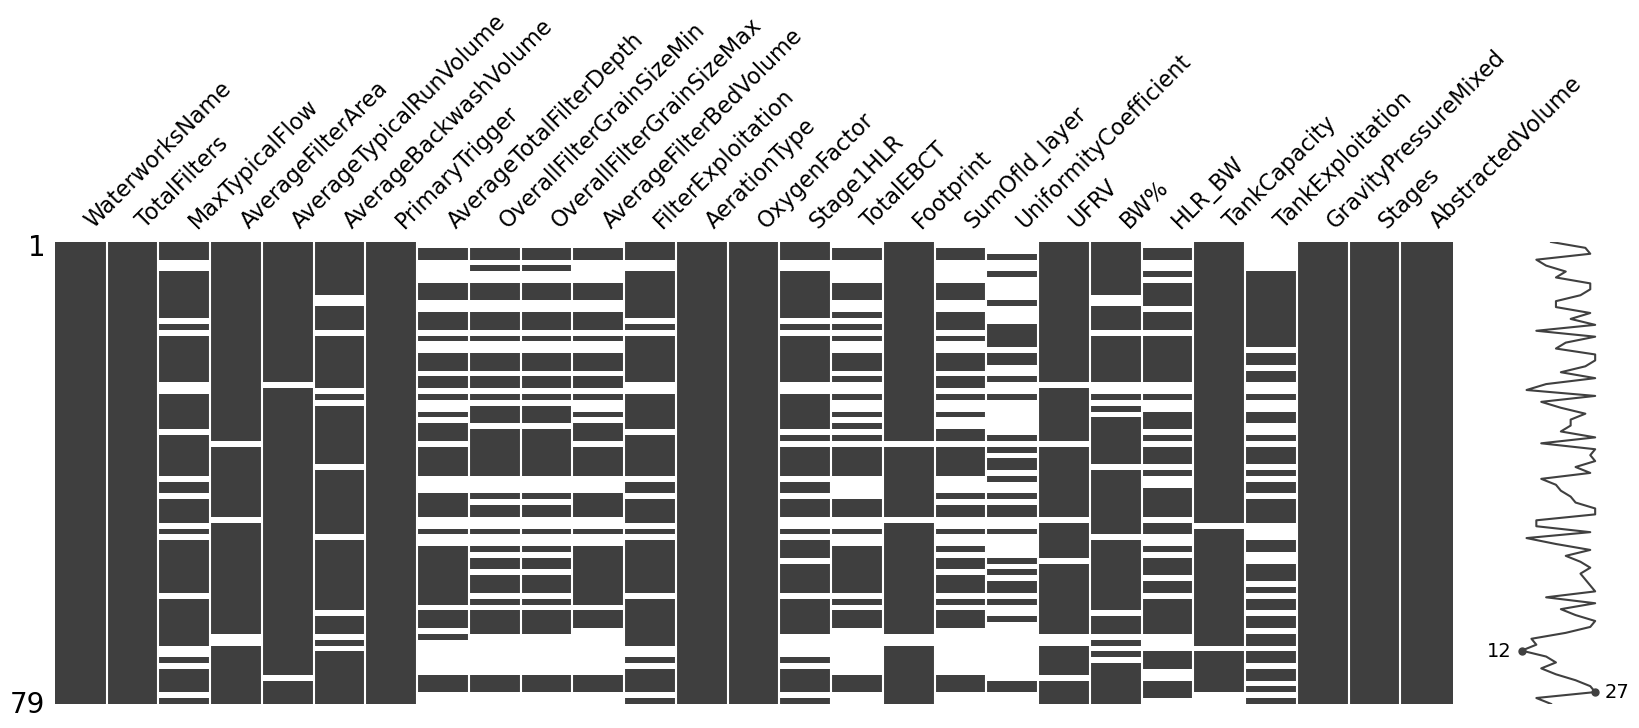

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

mno.matrix(df, figsize = (20, 6))

As you can see on the missing values plot for each column, there quite a few NaN values.
Let's figure out which columns have NaN values and what is the percentage.

In [5]:

columnsAbove15PercentageNaN = []
columnsBelow15PercentageNaN = []
for column in cdf.columns:
    nan_sum = cdf[column].isna().sum()
    nan_percentage = (nan_sum / len(cdf)) * 100
    if nan_percentage>0: # Printing only the column which have some NaN values
        if nan_percentage>=15:
            columnsAbove15PercentageNaN.append(column)
        elif nan_percentage<15 and nan_percentage>0:
            columnsBelow15PercentageNaN.append(column)
        print(f"Column '{column}': {nan_percentage:.2f}% NaN values")

print('-----------------------')
print(f'We are going to drop columns above 15 percent as this a very small data set\n so we can make the threshold relatively high to keep data in place.')
print(f'{columnsAbove15PercentageNaN}')

cdf = cdf.drop(columns=columnsAbove15PercentageNaN)
cdf

Column 'AverageFilterArea': 5.06% NaN values
Column 'AverageTypicalRunVolume': 2.53% NaN values
Column 'AverageBackwashVolume': 12.66% NaN values
Column 'Footprint': 5.06% NaN values
Column 'UFRV': 8.86% NaN values
Column 'TankCapacity': 5.06% NaN values
-----------------------
We are going to drop columns above 15 percent as this a very small data set
 so we can make the threshold relatively high to keep data in place.
[]


,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AerationType,OxygenFactor,Footprint,UFRV,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,6.000000,5200.00000,10.00,Time,Cascade,1.880000,143.341204,866.666667,27.294778,Gravity,Single,253543
1,4,4.908739,300.00000,28.00,Volume,Air injection,1.620000,16.714412,40.743665,2.576075,Pressure,Double,612094
2,4,15.343900,3800.00000,83.30,Volume,Bottom aeration,2.213333,44.693822,249.217919,21.825600,Gravity,Double,682318
3,2,16.000000,1200.00000,26.00,Volume,Cascade,2.073333,194.588021,75.000000,12.554300,Gravity,Single,156998
4,2,1.495000,250.00000,4.50,Volume,Cascade,1.313333,412.300024,167.224093,52.220566,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,47.940002,NaN,110.00,Mix,Cascade,1.546667,24.106636,NaN,9.176959,Gravity,Double,11454775
75,20,10.178760,4500.00000,57.00,Volume,Passive plate aerator,2.133333,22.050800,442.097088,6.040393,Pressure,Single,11021800
76,6,14.752500,2331.50137,51.57,Time,Bottom aeration,1.673333,209.076387,158.041107,22.367525,Gravity,Single,423362
77,12,37.437401,4400.00000,134.00,Volume,Cascade,2.200000,152.513970,93.489396,NaN,Gravity,Double,1521895


In [6]:
#Now let's take a look at imputing the missing NaN values in the following columns.
print(f'{columnsBelow15PercentageNaN}')
#Let's see how many NaN are there per row 
rowsWithNaN= cdf[cdf.isnull().sum(axis=1)>=4]#Play with this value
#So the maximum is 4 missing values in one row so we decide to not drop any rows.
print(rowsWithNaN)



['AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'Footprint', 'UFRV', 'TankCapacity']
    TotalFilters  AverageFilterArea  AverageTypicalRunVolume  \
67             2                NaN                   2500.0   

    AverageBackwashVolume PrimaryTrigger           AerationType  OxygenFactor  \
67                    NaN         Volume  Pure oxygen injection      1.646667   

    Footprint  UFRV  TankCapacity GravityPressureMixed  Stages  \
67        NaN   NaN      6.918841             Pressure  Single   

    AbstractedVolume  
67            633054  


## Now let's try imputing the missing values.
I will try to use three different methods for the sake of demonstration purposes. I also assume that the data is Missing at Random (MAR) or Missing Completely at Random (MCAR) as I believe that this data was not provided by a mistake or other random reason. Therefore, I choose to impute the data.

The first one will be done using mean which is a very simple and fast method and it works well with numeric data. Drawbacks are it doesn't factor the correlations between data and it is not very accurate.

The second is going to be done using KNNImputer from sklearn which way more accurate than mean, but it is also computationally expensive. However, this is not a problem for this small dataset.

The third one will be done using Regression Model to predict the missing data based on the present data. It has the same benefits as the second one and it is also computationally expensive. I will use IterativeImputer from sklearn to achieve that.

Below are the columns that we choose to impute: 
['AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'Footprint', 'UFRV', 'TankCapacity']
Below is a plot showing that there are no more missing values in the dataset.


<Axes: >

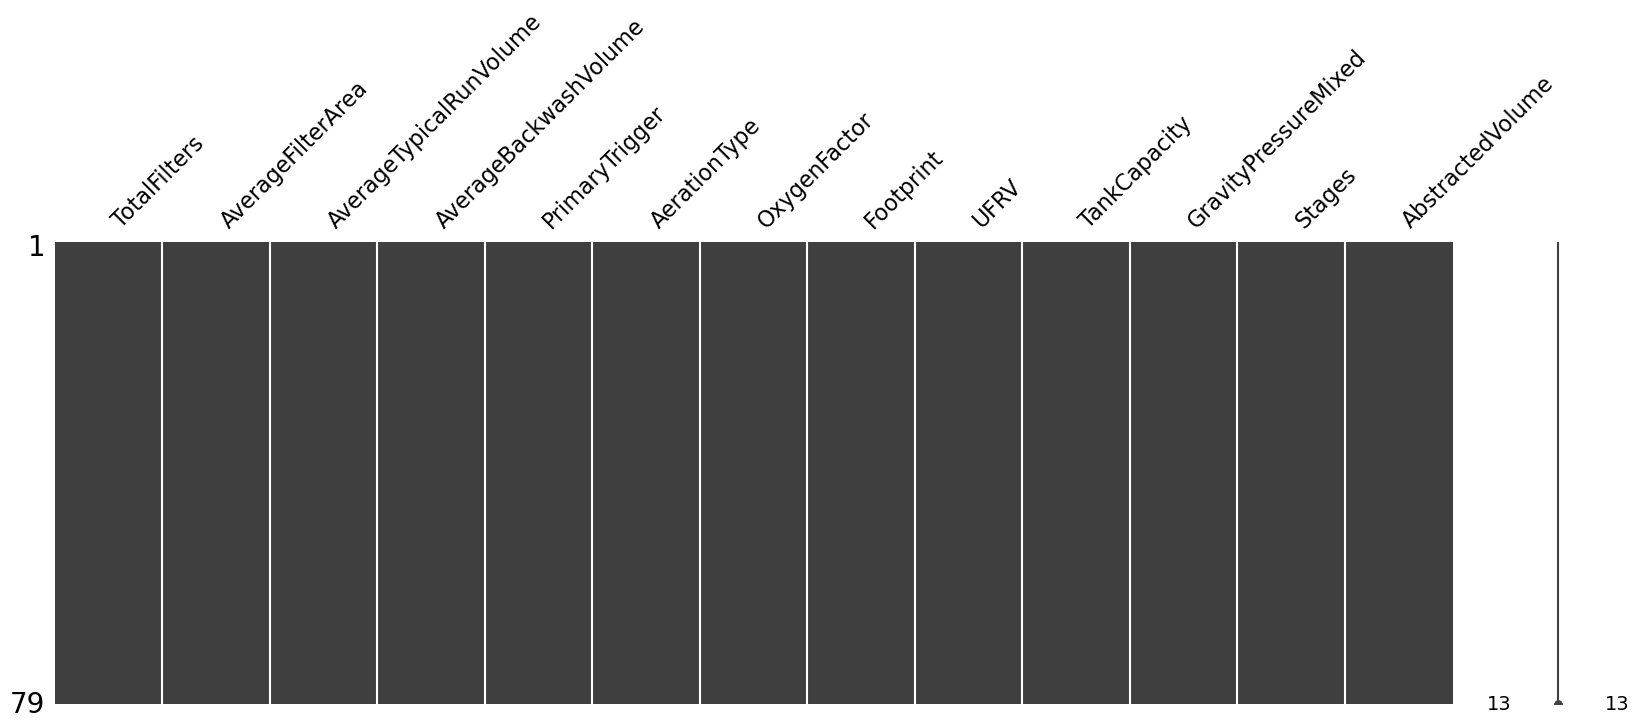

In [22]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

print(f'Below are the columns that we choose to impute: \n{columnsBelow15PercentageNaN}')
#Imputing using mean
cdf['AverageFilterArea'].fillna(cdf['AverageFilterArea'].mean(), inplace=True)
cdf['AverageTypicalRunVolume'].fillna(cdf['AverageTypicalRunVolume'].mean(), inplace=True)

#Imputing using KNNImputer 
columns_to_impute = ['AverageBackwashVolume', 'Footprint']
cdf[columns_to_impute] = KNNImputer().fit_transform(cdf[columns_to_impute])

#Imputing using regression
columns_regression = ['UFRV', 'TankCapacity']
cdf[columns_regression] = IterativeImputer().fit_transform(cdf[columns_regression])
cdf

print("Below is a plot showing that there are no more missing values in the dataset.")
mno.matrix(cdf, figsize = (20, 6))


## Let's scale the numeric data now.

I wanted to scale a part of the data using Min-Max scaling and another part using standardization, however I found out that there are potential issues with that approach. This could make the interpretation of the features more difficult as they would be on different scales. Another problem could be that some algorithms may be affected by the fact that the data is scaled differently. Therefore, I will use only standardization method which main advantages are that it preserves the shape of data distribution as well as it is robust to outliers.

In [13]:
from sklearn.preprocessing import StandardScaler

numeric_columns = cdf.select_dtypes(include=['float64', 'int64']).columns
scaled_data = StandardScaler().fit_transform(cdf[numeric_columns])
#Below is scaled data frame
sdf = pd.DataFrame(scaled_data, columns=numeric_columns)
#Now we also need to concatenate non-numeric columns with the scaled data frame
sdf = pd.concat([cdf[cdf.columns.difference(numeric_columns)], sdf], axis=1)
sdf

,AerationType,GravityPressureMixed,PrimaryTrigger,Stages,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,OxygenFactor,Footprint,UFRV,TankCapacity,AbstractedVolume
0,Cascade,Gravity,Time,Single,-0.062970,-0.676024,0.013237,-0.889573,-0.095208,0.923767,2.850454,0.658614,-0.458419
1,Air injection,Pressure,Volume,Double,-0.560431,-0.805423,-0.547112,-0.355197,-1.127717,-0.819477,-1.391718,-1.127504,-0.263853
2,Bottom aeration,Gravity,Volume,Double,-0.560431,0.431950,-0.146863,1.286525,1.228522,-0.434291,-0.320935,0.263423,-0.225746
3,Cascade,Gravity,Volume,Single,-1.057891,0.509748,-0.444191,-0.414572,0.672555,1.629271,-1.215768,-0.406500,-0.510808
4,Cascade,Gravity,Volume,Single,-1.057891,-1.210214,-0.552830,-1.052854,-2.345548,4.626466,-0.742079,2.459696,-0.592361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Cascade,Gravity,Mix,Double,2.424334,4.297105,0.000000,2.079183,-1.418938,-0.717710,-0.096894,-0.650539,5.619877
75,Passive plate aerator,Pressure,Volume,Single,3.419256,-0.180518,-0.066813,0.505742,0.910826,-0.746012,0.669746,-0.877181,5.384925
76,Bottom aeration,Gravity,Time,Single,-0.062970,0.361823,-0.314796,0.344539,-0.915920,1.828729,-0.789245,0.302582,-0.366267
77,Cascade,Gravity,Volume,Double,1.429413,3.051735,-0.078249,2.791684,1.175572,1.050046,-1.120801,-0.171603,0.229847


## Time to change the categorical data.

I am going to use One-Hot encoding to convert AerationType, GravityPressureMixed and PrimaryTrigger. For Stages I will use label encoding as I believe that this column represents ordinal data (i.e., categories with a meaningful order or ranking). If there are Double stages then there probably also was a single stage before meaning that there is some kind of order.

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['AerationType','GravityPressureMixed','PrimaryTrigger']
categorical_data = sdf[categorical_columns]
encoder = OneHotEncoder(dtype=int)
encoded_data = encoder.fit_transform(categorical_data)

label_encoder = LabelEncoder()
#Encoded data frame
edf = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
#Now concatenate
edf = pd.concat([edf, sdf.drop(columns=categorical_columns)], axis=1)
edf['Stages'] =label_encoder.fit_transform(edf['Stages']) 
edf

,AerationType_Air injection,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,...,Stages,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,OxygenFactor,Footprint,UFRV,TankCapacity,AbstractedVolume
0,0,0,1,0,0,0,0,0,1,0,...,2,-0.062970,-0.676024,0.013237,-0.889573,-0.095208,0.923767,2.850454,0.658614,-0.458419
1,1,0,0,0,0,0,0,0,0,0,...,0,-0.560431,-0.805423,-0.547112,-0.355197,-1.127717,-0.819477,-1.391718,-1.127504,-0.263853
2,0,1,0,0,0,0,0,0,1,0,...,0,-0.560431,0.431950,-0.146863,1.286525,1.228522,-0.434291,-0.320935,0.263423,-0.225746
3,0,0,1,0,0,0,0,0,1,0,...,2,-1.057891,0.509748,-0.444191,-0.414572,0.672555,1.629271,-1.215768,-0.406500,-0.510808
4,0,0,1,0,0,0,0,0,1,0,...,2,-1.057891,-1.210214,-0.552830,-1.052854,-2.345548,4.626466,-0.742079,2.459696,-0.592361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,1,0,0,0,0,0,1,0,...,0,2.424334,4.297105,0.000000,2.079183,-1.418938,-0.717710,-0.096894,-0.650539,5.619877
75,0,0,0,0,0,0,1,0,0,0,...,2,3.419256,-0.180518,-0.066813,0.505742,0.910826,-0.746012,0.669746,-0.877181,5.384925
76,0,1,0,0,0,0,0,0,1,0,...,2,-0.062970,0.361823,-0.314796,0.344539,-0.915920,1.828729,-0.789245,0.302582,-0.366267
77,0,0,1,0,0,0,0,0,1,0,...,0,1.429413,3.051735,-0.078249,2.791684,1.175572,1.050046,-1.120801,-0.171603,0.229847
